### Reading and Understanding the Data

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all necessary libraries for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
day = pd.read_csv("day.csv")

##### The dataset has 730 rows and 16 features

In [4]:
day.shape

(730, 16)

##### Four columns of type float, 11 columns of type int and 1 column of type object exists. None of the columns have any null values.

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Describe shows the statistics on all numerical columns

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Fetching the data to see the data at a glance

In [7]:
day.head().append(day.tail())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


#### Checking for Null percentage in columns and rows

In [8]:
# percentage of missing values in each column
round(100*(day.isnull().sum()/len(day)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# row-wise null count percentage
round((day.isnull().sum(axis=1)/len(day))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

##### The null percentage of all rows and columns is 0.

In [10]:
# Checking for duplicates and dropping the entire duplicate row if any
day_dup = day.copy()
day_dup.drop_duplicates(subset=None, inplace=True)
day_dup.shape

(730, 16)

##### No full row duplicates in teh dataset

### Pre-processing on the data

##### Dropping columns instant, dteday, casual and registered
- instant - This is record index and hence does not contribute any insight on the count
- dteday - Date column, it does not provide any significant insight on the data as we already have yr and mnth column in the dataset.
- casual and registered - count of casual users and count of registered users. cnt is count of total rental bikes including both casual and registered. Hence, the two feature are redundant and so we are dropping theese columns

In [11]:
columns_to_drop = ['instant','dteday','casual','registered']
day_new = day.drop(columns=columns_to_drop)

day_new.head().append(day_new.tail())

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796
729,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2729


##### Deriving the numerical and categorical varaible from the dataset and verifying against the data dictionary provided as well.
- 7 Categorical Variables: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
- 5 Numerical Variables : ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
- Target Variable: cnt

In [12]:
categorical_var = []
numerical_var = []
for column_name, column_data in day_new.iteritems():
    value_counts = column_data.value_counts()
    if len(value_counts) < 15:
        categorical_var.append(column_name)
    else:
        numerical_var.append(column_name)

        
print("There are",len(categorical_var),"categorical variables : ",categorical_var)
print("There are",len(numerical_var),"numerical variables : ",numerical_var)

There are 7 categorical variables :  ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
There are 5 numerical variables :  ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


##### Mapping the categorical variables to the original values as per the dictionary.
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : Not using the full description of the weathersituation column. Instead just using Clear, Cloudy, LightSnow, HeavyRain
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [13]:
def season(x):
    if(x == 1):
        return "spring"
    elif(x==2):
        return "summer"
    elif(x==3):
        return "fall"
    elif(x==4):
        return "winter"
    else:
        return "N/A"
day_new.season = day_new.season.apply(season)

In [14]:
def weekday(x):
    if(x==0):
        return "sunday"
    elif(x==1):
        return "monday"
    elif(x==2):
        return "tuesday"
    elif(x==3):
        return "wednesday"
    elif(x==4):
        return "thursday"
    elif(x==5):
        return "friday"
    elif(x==6):
        return "saturday"
    else:
        return "N/A"

day_new.weekday = day_new.weekday.apply(weekday)

In [15]:
def mnth(x):
    if(x==1):
        return "january"
    elif(x==2):
        return "february"
    elif(x==3):
        return "march"
    elif(x==4):
        return "april"
    elif(x==5):
        return "may"
    elif(x==6):
        return "june"
    elif(x==7):
        return "july"
    elif(x==8):
        return "august"
    elif(x==9):
        return "september"
    elif(x==10):
        return "october"
    elif(x==11):
        return "november"
    elif(x==12):
        return "december"
    else:
        return "N/A"

day_new.mnth = day_new.mnth.apply(mnth)

In [16]:
def weathersit(x):
    if(x==1):
        return "Clear"
    elif(x==2):
        return "Cloudy"
    elif(x==3):
        return "LightSnow"
    elif(x==4):
        return "HeavyRain"
    else:
        return "N/A"
    
day_new.weathersit = day_new.weathersit.apply(weathersit)

##### EDA - Visualizing data
- Pairplot to see the numerical variable distribution
- Boxplot and Barplot to visualize the categorical variable
- Heatmap to see the correlation of variables amonst each other.

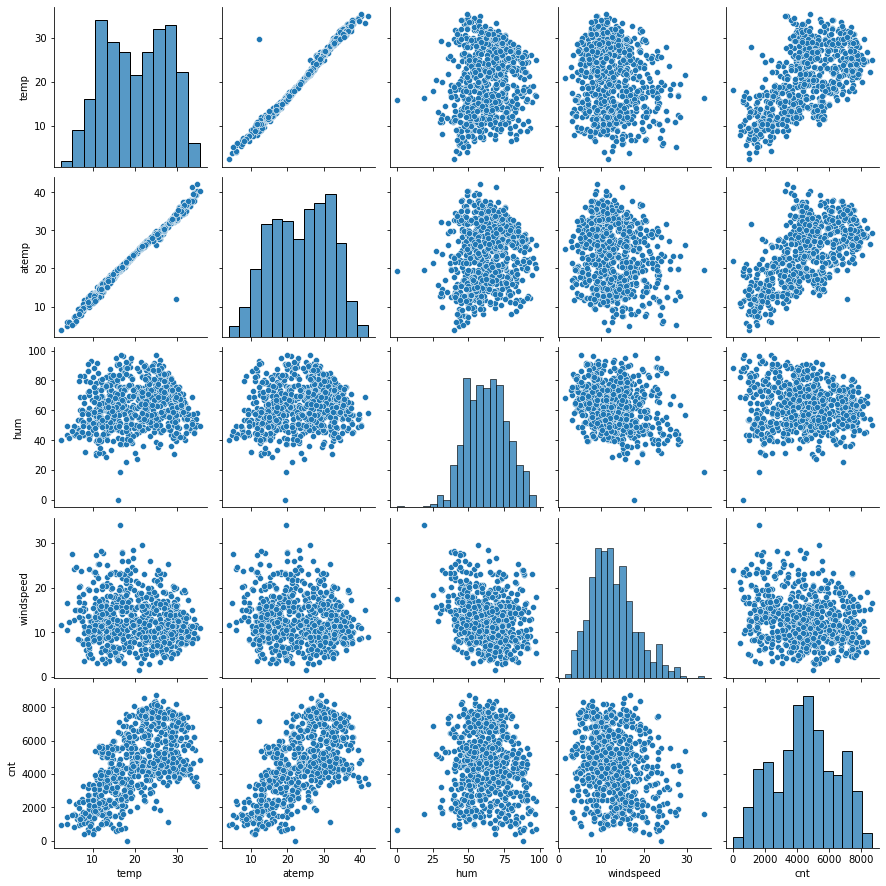

In [17]:
sns.pairplot(day[numerical_var])
plt.show()

##### We see some linear relationship between temp/atemp and cnt 

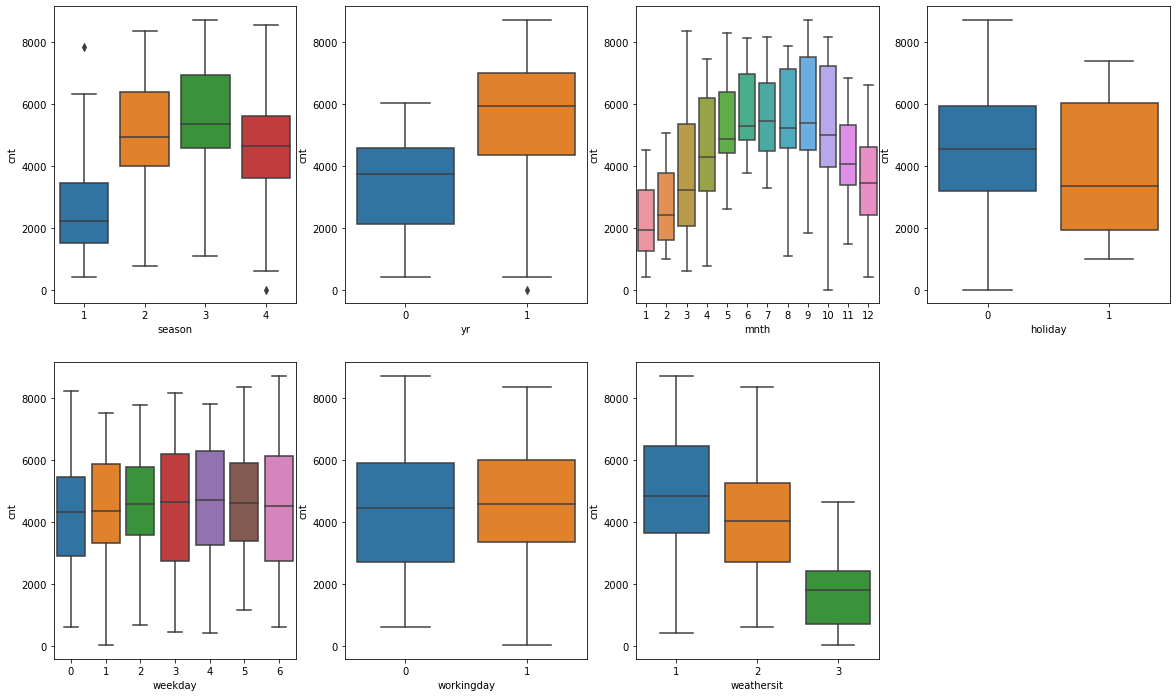

In [18]:
# visualising the categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=day)

plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=day)

plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=day)

plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=day)

plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=day)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=day)

plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=day)

plt.show()

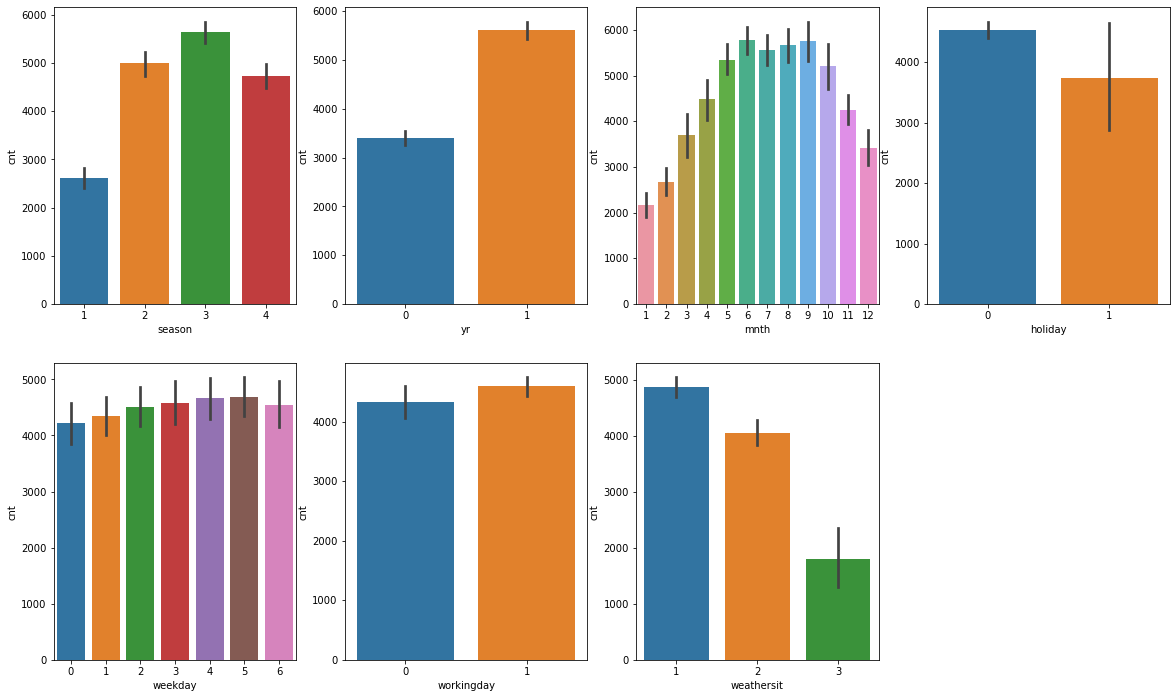

In [19]:
# visualising the categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.barplot(data=day, x='season', y='cnt')

plt.subplot(2,4,2)
sns.barplot(data=day, x='yr', y='cnt')

plt.subplot(2,4,3)
sns.barplot(data=day, x='mnth', y='cnt')

plt.subplot(2,4,4)
sns.barplot(data=day, x='holiday', y='cnt')

plt.subplot(2,4,5)
sns.barplot(data=day, x='weekday', y='cnt')

plt.subplot(2,4,6)
sns.barplot(data=day, x='workingday', y='cnt')

plt.subplot(2,4,7)
sns.barplot(data=day, x='weathersit', y='cnt')

plt.show()

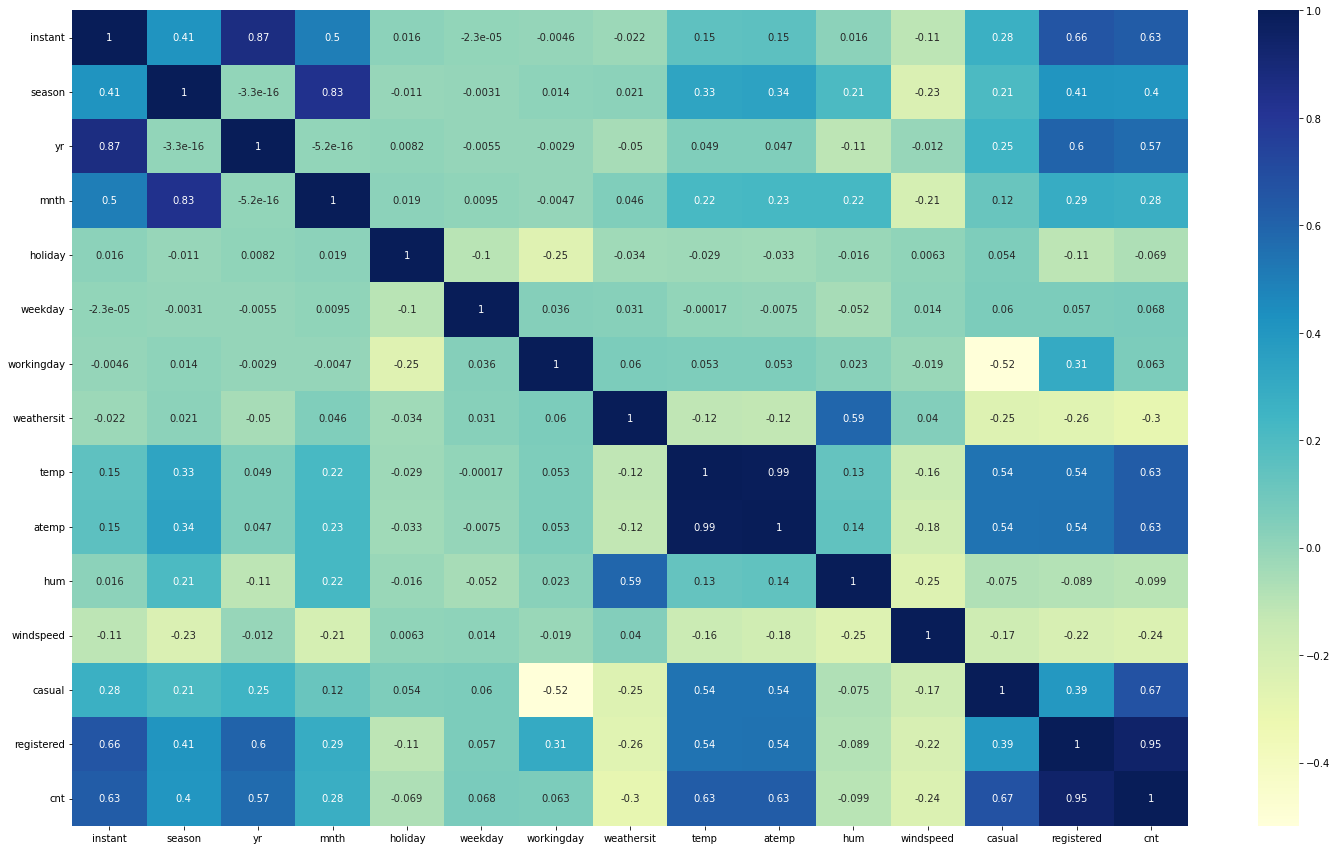

In [20]:
# heatmap
plt.figure(figsize = (25, 15))
sns.heatmap(day.corr(), annot = True, cmap='YlGnBu')
plt.show()

##### From the heatmap we can see a high correleation between temp and atemp which means we can drop one of the two predictor variables. We also see high positive correlation between temp/atemp, yr and cnt and high negative correlation between spring and cnt. There are also high correleation between months and season which is obvious.

##### Create dummy variables for the categorical varibales and drop_first=True for removing redundancy and multicollinearity

In [21]:
season = pd.get_dummies(day_new['season'], drop_first=True)
weekday = pd.get_dummies(day_new['weekday'], drop_first=True)
mnth = pd.get_dummies(day_new['mnth'], drop_first=True)
weathersit = pd.get_dummies(day_new['weathersit'], drop_first=True)
day_new = pd.concat([day_new, season, weekday, mnth, weathersit], axis = 1)
categorical_columns_to_drop = ['season','weekday','mnth','weathersit']
day_new = day_new.drop(columns=categorical_columns_to_drop)

day_new.head().append(day_new.tail())

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,january,july,june,march,may,november,october,september,Cloudy,LightSnow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,0,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,0
729,1,0,1,8.849153,11.17435,57.7500,10.374682,2729,1,0,...,0,0,0,0,0,0,0,0,1,0


##### Split the dataset into train and test data using a 70:30 ratio and a random_state of 100
- Train data set has 510 rows
- Test data has 220 rows

In [22]:
df_train, df_test = train_test_split(day_new, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Feature Scaling to normalize the range of independent variables using Normalization scaling with MinMaxScaler

In [23]:
# Running fit and transform on train dataset as the max value should be 1 and the min should be 0 for all numerical variables
scaler = MinMaxScaler()
df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])

In [24]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,january,july,june,march,may,november,october,september,Cloudy,LightSnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### X_train are the predictor features and y_train is the target variable

In [25]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

##### Selecting features for the model using mixed technique. 
- First running RFE with the output number of the variable equal to 15
- Manually checking the p-value/vif/r-squared to remove the features until all the values are inline.

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)                           
rfe = rfe.fit(X_train, y_train)

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'saturday', 'sunday', 'august', 'october', 'september',
       'Cloudy', 'LightSnow'],
      dtype='object')

##### Columns that were retained after applying RFE are['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'saturday', 'sunday', 'august', 'october', 'september', 'Cloudy', 'LightSnow']

In [28]:
X_train.columns[~rfe.support_]

Index(['atemp', 'spring', 'monday', 'thursday', 'tuesday', 'wednesday',
       'december', 'february', 'january', 'july', 'june', 'march', 'may',
       'november'],
      dtype='object')

In [29]:
X_train_rfe = X_train[col]

##### Adding constant to the predictor variables

In [30]:
X_train_lm1 = sm.add_constant(X_train_rfe)

In [31]:
lm1 = sm.OLS(y_train, X_train_lm1).fit() 

In [32]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.70e-192
Time:                        23:27:42   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1640      0.022      7.507      0.000       0.121       0.207
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0250      0.021     -1.205      0.229      -0.066       0.016
workingday     0.0749      0.009      8.548      0.000       0.058       0.092
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
saturday       0.0834      0.011      7.657      0.000       0.062       0.105
sunday         0.0307      0.012      2.670      0.008       0.008       0.053
august         0.0557      0.016      3.457      0.001       0.024       0.087
october        0.0385      0.017      2.230      0.026       0.005       0.072
september      0.1252      0.016      7.757      0.000       0.093       0.157
Cloudy        -0.0568      0.010     -5.482      0.000      -0.077      -0.036
LightSnow     -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     2.59e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,31.45
8,saturday,7.77
9,sunday,7.65
1,holiday,2.14
4,hum,1.87
7,winter,1.71
3,temp,1.59
13,Cloudy,1.56
11,october,1.49
10,august,1.46


##### For Model 1 with 15 features we see that the adjusted R-squared is 0.843 but we have p-value and vif for certain variables. Dropping feature with high p-value first, i.e., holiday

In [34]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,31.45
8,saturday,7.77
9,sunday,7.65
1,holiday,2.14
4,hum,1.87
7,winter,1.71
3,temp,1.59
13,Cloudy,1.56
11,october,1.49
10,august,1.46


In [36]:
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [37]:
lm2.params

const         0.139081
yr            0.229241
workingday    0.099865
temp          0.530905
hum          -0.170764
windspeed    -0.185795
summer        0.104917
winter        0.134863
saturday      0.108379
sunday        0.055677
august        0.055722
october       0.038505
september     0.125195
Cloudy       -0.056753
LightSnow    -0.246985
dtype: float64

In [38]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.70e-192
Time:                        23:27:43   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1391      0.036      3.859      0.000       0.068       0.210
yr             0.2292      0.008     28.712      0.000       0.214       0.245
workingday     0.0999      0.025      3.942      0.000       0.050       0.150
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
saturday       0.1084      0.027      4.048      0.000       0.056       0.161
sunday         0.0557      0.027      2.069      0.039       0.003       0.109
august         0.0557      0.016      3.457      0.001       0.024       0.087
october        0.0385      0.017      2.230      0.026       0.005       0.072
september      0.1252      0.016      7.757      0.000       0.093       0.157
Cloudy        -0.0568      0.010     -5.482      0.000      -0.077      -0.036
LightSnow     -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Dropping variables with high p-value

In [39]:
X_train_new = X_train_new.drop(["sunday"], axis = 1)

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.06
2,temp,10.01
1,workingday,4.56
4,windspeed,3.76
6,winter,2.25
11,Cloudy,2.13
0,yr,2.03
5,summer,1.83
7,saturday,1.79
8,august,1.60


In [41]:
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [42]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.92e-192
Time:                        23:27:43   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1850      0.028      6.497      0.000       0.129       0.241
yr             0.2294      0.008     28.640      0.000       0.214       0.245
workingday     0.0525      0.011      4.832      0.000       0.031       0.074
temp           0.5325      0.022     24.152      0.000       0.489       0.576
hum           -0.1698      0.037     -4.578      0.000      -0.243      -0.097
windspeed     -0.1866      0.025     -7.362      0.000      -0.236      -0.137
summer         0.1056      0.011      9.817      0.000       0.084       0.127
winter         0.1341      0.012     11.212      0.000       0.111       0.158
saturday       0.0611      0.014      4.365      0.000       0.034       0.089
august         0.0561      0.016      3.469      0.001       0.024       0.088
october        0.0398      0.017      2.297      0.022       0.006       0.074
september      0.1235      0.016      7.635      0.000       0.092       0.155
Cloudy        -0.0565      0.010     -5.438      0.000      -0.077      -0.036
LightSnow     -0.2462      0.026     -9.424      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       75.917   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.075
Skew:                          -0.745   Prob(JB):                     9.74e-44
Kurtosis:                       5.665   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
lm3.params

const         0.185025
yr            0.229408
workingday    0.052471
temp          0.532481
hum          -0.169794
windspeed    -0.186628
summer        0.105629
winter        0.134130
saturday      0.061100
august        0.056094
october       0.039755
september     0.123457
Cloudy       -0.056477
LightSnow    -0.246216
dtype: float64

##### Removing hum based on high VIF

In [44]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.27
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,winter,1.98
4,summer,1.83
6,saturday,1.70
8,october,1.60
7,august,1.59
10,Cloudy,1.55


In [46]:
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train, X_train_lm4).fit()

In [47]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          9.00e-189
Time:                        23:27:43   Log-Likelihood:                 505.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     497   BIC:                            -930.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0848      0.019      4.564      0.000       0.048       0.121
yr             0.2332      0.008     28.705      0.000       0.217       0.249
workingday     0.0553      0.011      5.006      0.000       0.034       0.077
temp           0.5123      0.022     23.253      0.000       0.469       0.556
windspeed     -0.1540      0.025     -6.207      0.000      -0.203      -0.105
summer         0.1026      0.011      9.368      0.000       0.081       0.124
winter         0.1260      0.012     10.443      0.000       0.102       0.150
saturday       0.0660      0.014      4.633      0.000       0.038       0.094
august         0.0543      0.016      3.294      0.001       0.022       0.087
october        0.0355      0.018      2.016      0.044       0.001       0.070
september      0.1169      0.016      7.114      0.000       0.085       0.149
Cloudy        -0.0836      0.009     -9.603      0.000      -0.101      -0.066
LightSnow     -0.2919      0.025    -11.858      0.000      -0.340      -0.244
==============================================================================
Omnibus:                       73.701   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.090
Skew:                          -0.730   Prob(JB):                     8.70e-42
Kurtosis:                       5.602   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Removing october based on high p-value

In [48]:
X_train_new = X_train_new.drop(["october"], axis = 1)

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.82
6,saturday,1.69
7,august,1.58
9,Cloudy,1.54
5,winter,1.51
8,september,1.30


In [50]:
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train, X_train_lm5).fit()

In [51]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.31e-189
Time:                        23:27:43   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0809      0.019      4.365      0.000       0.045       0.117
yr             0.2328      0.008     28.578      0.000       0.217       0.249
workingday     0.0546      0.011      4.926      0.000       0.033       0.076
temp           0.5208      0.022     24.022      0.000       0.478       0.563
windspeed     -0.1518      0.025     -6.105      0.000      -0.201      -0.103
summer         0.1010      0.011      9.220      0.000       0.080       0.123
winter         0.1379      0.011     13.083      0.000       0.117       0.159
saturday       0.0653      0.014      4.576      0.000       0.037       0.093
august         0.0512      0.016      3.111      0.002       0.019       0.084
september      0.1117      0.016      6.864      0.000       0.080       0.144
Cloudy        -0.0826      0.009     -9.474      0.000      -0.100      -0.065
LightSnow     -0.2860      0.025    -11.664      0.000      -0.334      -0.238
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Removing August as it has a p-value greater than 0.000, even though temp has higher vif as temp can be an important predictor in this case

In [52]:
X_train_new = X_train_new.drop(["august"], axis = 1)

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
6,saturday,1.69
4,summer,1.57
8,Cloudy,1.53
5,winter,1.40
7,september,1.20
9,LightSnow,1.08


In [54]:
X_train_lm6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train, X_train_lm6).fit()

In [55]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.13e-188
Time:                        23:27:43   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.000       0.038       0.112
yr             0.2331      0.008     28.370      0.000       0.217       0.249
workingday     0.0561      0.011      5.024      0.000       0.034       0.078
temp           0.5499      0.020     27.861      0.000       0.511       0.589
windspeed     -0.1552      0.025     -6.195      0.000      -0.204      -0.106
summer         0.0886      0.010      8.608      0.000       0.068       0.109
winter         0.1307      0.010     12.600      0.000       0.110       0.151
saturday       0.0675      0.014      4.693      0.000       0.039       0.096
september      0.0974      0.016      6.184      0.000       0.066       0.128
Cloudy        -0.0800      0.009     -9.143      0.000      -0.097      -0.063
LightSnow     -0.2871      0.025    -11.611      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
lm6.params

const         0.075009
yr            0.233139
workingday    0.056117
temp          0.549892
windspeed    -0.155203
summer        0.088621
winter        0.130655
saturday      0.067500
september     0.097365
Cloudy       -0.080022
LightSnow    -0.287090
dtype: float64

##### We are now left with 10 variables and hence not dropping any more predictor variables.
- vif < 5 for all the variables
- p-value < 0.05 for all variables
- Adjusted R-squared > 80%
- F-statistic is 253 which is high and Prob (F-statistic) is 3.13e-188 which is low indicating a good fit model

#### Predicting the y value sand seeing the assumptions are satiusfied or not

In [57]:
y_train_pred = lm6.predict(X_train_lm6)

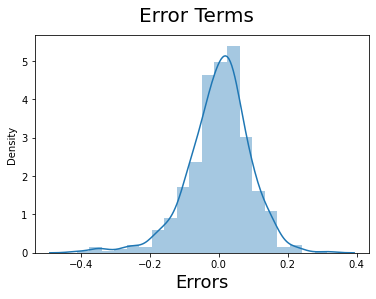

In [58]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)    
plt.show()

#### Error Terms are normally distributed.

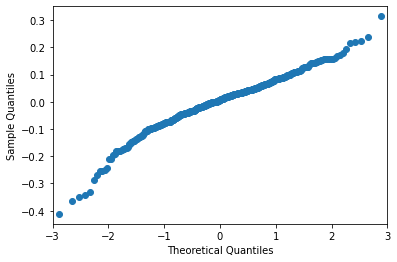

In [59]:
residuals = lm6.resid
sm.qqplot(residuals)
plt.show()

##### Error terms should have constant variance (homoscedasticity)

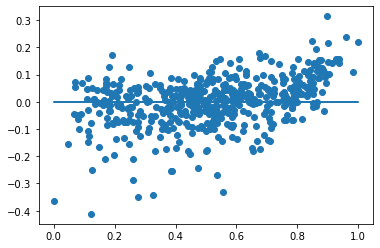

In [60]:
plt.scatter(y_train, residuals)
plt.plot(y_train, [0]*len(y_train))
plt.show()

##### No Multicollinearity

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
6,saturday,1.69
4,summer,1.57
8,Cloudy,1.53
5,winter,1.40
7,september,1.20
9,LightSnow,1.08


##### Error terms are independent of each other. Little to no autocorrelation exists between the residuals. Using Durbin – Watson (DW) statistic to evaluate the same

In [62]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(residuals)

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.0885340299289727
Little to no autocorrelation 

Assumption satisfied


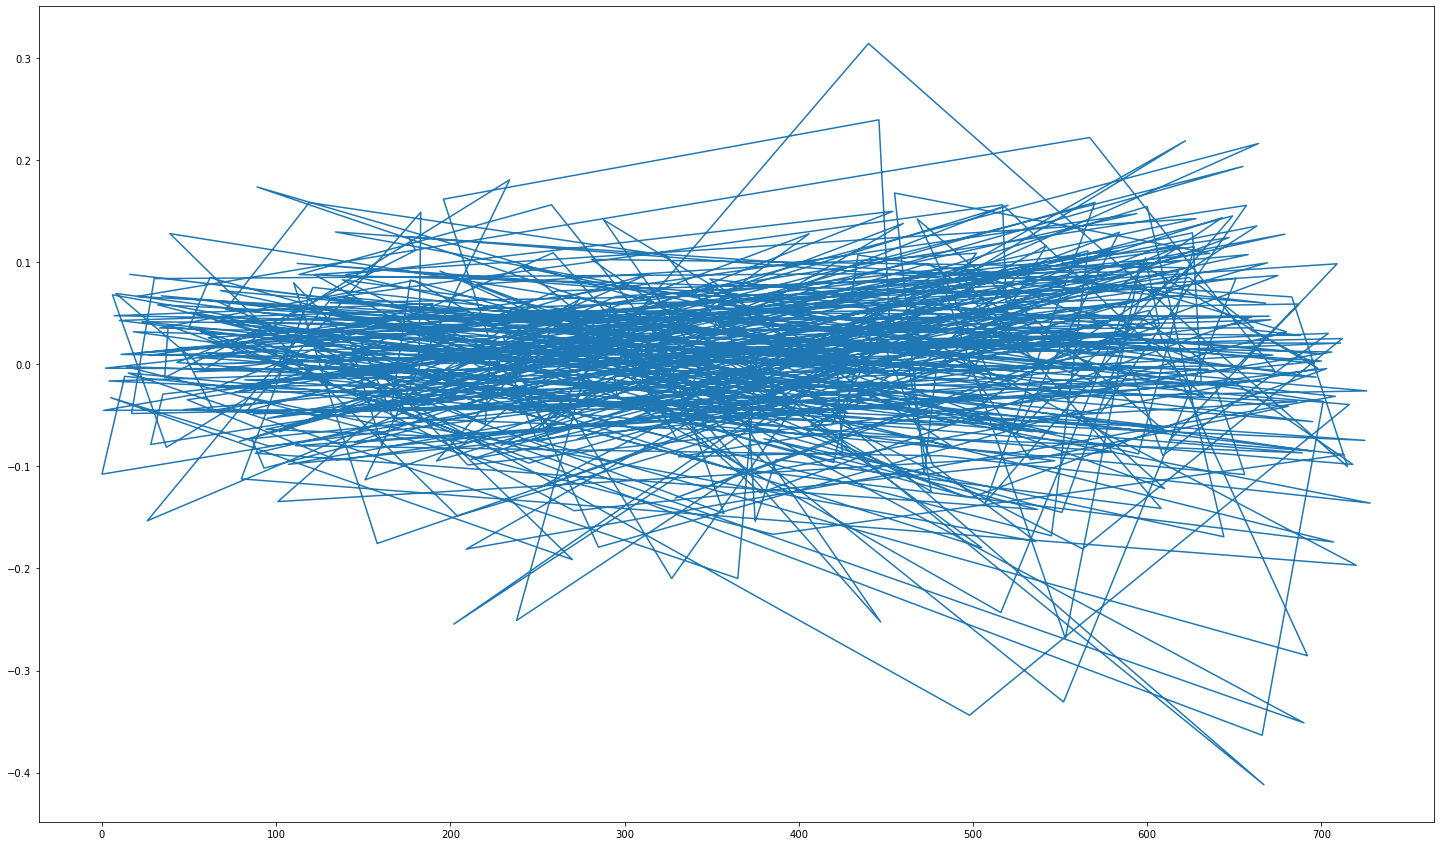

In [63]:
plt.figure(figsize = (25, 15))
plt.plot(residuals.index, residuals)
plt.show()

In [64]:
r2_score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
no_of_rows_train = X_train.shape[0]
predictors_number = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_score_train)*(no_of_rows_train-1)/(no_of_rows_train-predictors_number-1)
print("R-squared for train data :",r2_score_train)
print("Adjusted R-squared for train data :",adjusted_r2_train)

R-squared for train data : 0.8352749595695672
Adjusted R-squared for train data : 0.8253228217102285


##### Test the model on the test data set. Applying the scaling on the test sets

In [65]:
df_test[numerical_var] = scaler.transform(df_test[numerical_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,january,july,june,march,may,november,october,september,Cloudy,LightSnow
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,1,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,1,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,0,0,0


In [66]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   spring      220 non-null    uint8  
 8   summer      220 non-null    uint8  
 9   winter      220 non-null    uint8  
 10  monday      220 non-null    uint8  
 11  saturday    220 non-null    uint8  
 12  sunday      220 non-null    uint8  
 13  thursday    220 non-null    uint8  
 14  tuesday     220 non-null    uint8  
 15  wednesday   220 non-null    uint8  
 16  august      220 non-null    uint8  
 17  december    220 non-null    uint8  
 18  february    220 non-null    uint8  
 19  january     220 non-null   

In [67]:
col1=X_train_new.columns
X_test=X_test[col1]

In [68]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   windspeed   220 non-null    float64
 5   summer      220 non-null    uint8  
 6   winter      220 non-null    uint8  
 7   saturday    220 non-null    uint8  
 8   september   220 non-null    uint8  
 9   Cloudy      220 non-null    uint8  
 10  LightSnow   220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


##### Predicting y values based on the ml6 liner regression model

In [69]:
y_pred = lm6.predict(X_test_lm6)

### Evaluation of the model

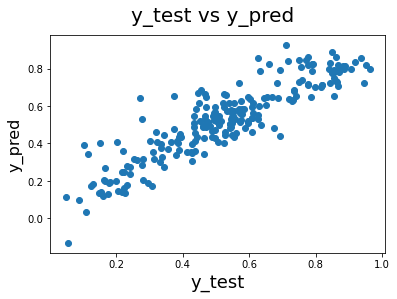

In [70]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [71]:
r2_score_test = r2_score(y_true=y_test, y_pred=y_pred)
no_of_rows_test = X_test.shape[0]
predictors_number = X_test.shape[1]

adjusted_r2 = 1-(1-r2_score_test)*(no_of_rows_test-1)/(no_of_rows_test-predictors_number-1)
print("R-squared for test data :",r2_score_test)
print("Adjusted R-squared for test data :",adjusted_r2)
print("The difference in train and test r-squared value :",(r2_score_train-r2_score_test))
print("The difference in train and test adjusted r-squared value :",(adjusted_r2_train-adjusted_r2))

R-squared for test data : 0.7961390438459764
Adjusted R-squared for test data : 0.7863849311113342
The difference in train and test r-squared value : 0.039135915723590764
The difference in train and test adjusted r-squared value : 0.0389378905988943


##### Null Hypothesis is rejected as all our coefficients are not 0.¶

#### The test data has an R-squared of 0.796 with a difference less than 5% from train data set, we conclude that the model is a good fit for population.

#### The equation of best fitted line based on model lm6 is 

#### cnt = 0.075009 + (yr * 0.233139) + (workingday * 0.056117) + (temp * 0.549892) - (windspeed * 0.155203) + (summer * 0.088621) + (winter * 0.130655) + (saturday * 0.067500) + (september * 0.097365) - (Cloudy * 0.080022) - (LightSnow * 0.287090)

#### We also see that the model has high correlation with temperature and year while it has a negative correlation with windspeed, cloudy and snowy weather